# Fifa 20 Ultimate Team Player Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#statistical">Statistical Tests</a></li>
</ul>

<a id='intro'></a>
## Introduction

> 

<a id='wrangling'></a>
## Data Wrangling Process


#### Define

    - Remove column origin.
    - Remove column revision.
    - Remove columns (ps4, xbox, pc) _last, _min, _max, _prp.
    - Remove specialities.
  

In [1]:
import zipfile
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
random.seed(42)

In [100]:
# Extract contents from Premier League zip file 

with zipfile.ZipFile('fifa-20-ultimate-team-players-dataset.zip', 'r') as myzip:
    myzip.extractall()

In [2]:
# Read Players CSV

df_20_players = pd.read_csv('fut_bin20_players.csv')

/Users/Eduardo/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Dataframe selection 

df_clean = df_20_players.copy()

In [4]:
df_clean.sample(10)

,futbin_id,player_name,player_extended_name,quality,revision,origin,overall,club,league,nationality,...,ps4_max,ps4_prp,xbox_last,xbox_min,xbox_max,xbox_prp,pc_last,pc_min,pc_max,pc_prp
12603,34893,Källman,Robin Källman,Bronze - Rare,Normal,NaN,54,HJK Helsinki,Finnliiga,Finland,...,10000.0,0,1500.0,150.0,10000.0,13,200.0,150.0,10000.0,0
8291,30522,Sweat,Ben Sweat,Silver - Non-Rare,Normal,NaN,67,New York City FC,Major League Soccer,United States,...,10000.0,4,800.0,150.0,10000.0,6,400.0,150.0,10000.0,2
6555,28772,Buballa,Daniel Buballa,Silver - Non-Rare,Normal,NaN,68,FC St. Pauli,Bundesliga 2,Germany,...,10000.0,0,2300.0,150.0,10000.0,21,800.0,150.0,10000.0,6
4112,26307,Coureur,Mathias Coureur,Bronze - Rare,Normal,NaN,64,Seongnam FC,K LEAGUE Classic,France,...,10000.0,1,1100.0,150.0,10000.0,9,650.0,150.0,10000.0,5
17582,43485,De Sciglio,Mattia De Sciglio,Gold - Rare,CL,NaN,77,Piemonte Calcio,Serie A TIM,Italy,...,10000.0,13,2200.0,350.0,10000.0,19,2000.0,350.0,10000.0,17
12756,35049,Çetin,Şahverdi Çetin,Bronze - Rare,Normal,NaN,59,Eintracht Frankfurt,Bundesliga,Germany,...,10000.0,5,700.0,150.0,10000.0,5,3200.0,150.0,10000.0,30
4858,27058,Winnall,Sam Winnall,Silver - Non-Rare,Normal,NaN,67,Sheffield Wednesday,EFL Championship,England,...,10000.0,4,600.0,150.0,10000.0,4,500.0,150.0,10000.0,3
4274,26471,Murphy,Jamie Murphy,Silver - Non-Rare,Normal,NaN,71,Rangers FC,Scottish Premiership,Scotland,...,10000.0,7,750.0,150.0,10000.0,6,700.0,150.0,10000.0,5
14731,37070,Albadawi,Nazmi Albadawi,Bronze - Non-Rare,Normal,NaN,61,FC Cincinnati,Major League Soccer,Palestine,...,10000.0,0,450.0,150.0,10000.0,3,200.0,150.0,10000.0,0
552,19778,Subotic,Neven Subotic,Gold - Non-Rare,Normal,NaN,77,1. FC Union Berlin,Bundesliga,Serbia,...,10000.0,4,800.0,350.0,10000.0,4,800.0,350.0,10000.0,4


In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18775 entries, 0 to 18774
Data columns (total 95 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   futbin_id             18775 non-null  int64  
 1   player_name           18775 non-null  object 
 2   player_extended_name  18775 non-null  object 
 3   quality               18775 non-null  object 
 4   revision              18409 non-null  object 
 5   origin                1664 non-null   object 
 6   overall               18775 non-null  int64  
 7   club                  18775 non-null  object 
 8   league                18775 non-null  object 
 9   nationality           18775 non-null  object 
 10  position              18775 non-null  object 
 11  age                   18775 non-null  int64  
 12  date_of_birth         18775 non-null  object 
 13  height                18775 non-null  int64  
 14  weight                18775 non-null  int64  
 15  intl_rep           

In [7]:
df_clean.origin.unique()

array(['Prime', 'Medium', 'Base', nan, 'Season 1 Obj', 'TOTW1',
       'Transfers', 'Nation Change', 'OTW', 'TOTW2', 'TOTW3', 'TOTW4',
       'TOTW5', 'UltimateScream1', 'TOTW6', 'UltimateScream2', 'TOTW7',
       'TOTW8', 'RTTF1', 'Season 2 Obj', 'TOTW9', 'RTTF2', 'TOTW10',
       'TOTW11', 'TOTW12', 'TOTGS', 'TOTW13', 'TOTW14', 'TOTW15',
       'TOTW16', 'TOTY', 'TOTW17', 'TOTW18', 'Headliners1', 'TOTW19',
       'Headliners2', 'TOTW20', 'FutureStars'], dtype=object)

In [8]:
df_clean.revision.unique()

array(['Icon', 'Normal', 'PL POTM', 'Seasonal Objectives', 'Objectives',
       'IF', nan, 'Bundesliga POTM', 'MLS POTM', 'OTW', 'OTW SBC',
       'Flashback SBC', 'Premium SBC', 'Ligue 1 POTM', 'Bundes POTM',
       'Halloween SBC', 'Halloween', 'Halloween Obj.', 'CL', 'SBC',
       'Objective Special', 'SIF', 'Hero', 'UCL LIVE', 'UEL LIVE',
       'UCL LIVE SBC', 'UEL LIVE Obj.', 'UEL LIVE SBC',
       'Player Moments SBC', 'Player Moments Obj.', 'CL TOTT SBC',
       'CL TOTT', 'Europa TOTT', 'CL TOTT Obj.', 'Europa TOTT SBC',
       'FUTmas SBC', 'FUTmas Obj.', 'FUTmas', 'Holiday Season',
       'FUTmas Hld Season', 'FUTmas Obj', 'TIF', 'TOTY Flashback Obj',
       'TOTY', 'TOTY Flashback SBC', 'LaLiga POTM SBC', 'Players Moments',
       'Record Breaker', 'Headliners', 'Headliners Obj', 'Headliners SBC',
       'FUT Future Stars', 'FUT Future Stars SBC', 'FutureStars'],
      dtype=object)

In [9]:
df_clean.traits.unique()

array(['Solid Player, Leadership, Finesse Shot, Playmaker (CPU AI Only), Technical Dribbler (CPU AI Only)',
       'Finesse Shot, Flair, Playmaker (CPU AI Only), Chip Shot (CPU AI Only), Technical Dribbler (CPU AI Only)',
       'Finesse Shot, Speed Dribbler (CPU AI Only), Chip Shot (CPU AI Only), Technical Dribbler (CPU AI Only)',
       nan,
       'Technical Dribbler (CPU AI Only), Chip Shot, Playmaker (CPU AI Only), Flair, Finesse Shot',
       'Dives Into Tackles (CPU AI Only), Leadership, Team Player',
       'Technical Dribbler (CPU AI Only), Chip Shot, Speed Dribbler (CPU AI Only), Finesse Shot',
       'Leadership, Team Player',
       'Finesse Shot, Team Player, Technical Dribbler (CPU AI Only)',
       'Power Free-Kick, Leadership, Long Shot Taker (CPU AI Only), Speed Dribbler (CPU AI Only)',
       'Flair, Technical Dribbler (CPU AI Only)',
       'Speed Dribbler (CPU AI Only), Playmaker (CPU AI Only), Power Header',
       'Solid Player, Dives Into Tackles (CPU AI Only), L

In [10]:
df_clean.drop(['origin', 'revision'], axis=1, inplace=True)

df_clean.head()

,futbin_id,player_name,player_extended_name,quality,overall,club,league,nationality,position,age,...,ps4_max,ps4_prp,xbox_last,xbox_min,xbox_max,xbox_prp,pc_last,pc_min,pc_max,pc_prp
0,1,Pelé,Edson Arantes Nascimento,Gold - Rare,98,Icons,Icons,Brazil,CAM,79,...,11700000.0,47,5198000.0,593000.0,11300000.0,43,NaN,790000.0,15000000.0,47
1,2,Maradona,Diego Maradona,Gold - Rare,97,Icons,Icons,Argentina,CAM,59,...,7600000.0,47,3799000.0,364000.0,6900000.0,52,6500000.0,456000.0,8700000.0,73
2,3,Ronaldo,Ronaldo Luís Nazário de Lima,Gold - Rare,96,Icons,Icons,Brazil,ST,43,...,15000000.0,90,10300000.0,945000.0,15000000.0,66,NaN,790000.0,15000000.0,96
3,4,Pelé,Edson Arantes Nascimento,Gold - Rare,95,Icons,Icons,Brazil,CF,79,...,6500000.0,58,3375000.0,313000.0,5900000.0,54,5000000.0,399000.0,7600000.0,63
4,5,Maradona,Diego Maradona,Gold - Rare,95,Icons,Icons,Argentina,CAM,59,...,3400000.0,55,1825000.0,193000.0,3700000.0,46,2200000.0,234000.0,4400000.0,47


In [11]:
df_clean.drop(['ps4_last', 'ps4_min', 'ps4_max', 'ps4_prp', 'xbox_last', 'xbox_min', 'xbox_max', 'xbox_prp', 'pc_last', 'pc_min', 'pc_max', 'pc_prp'], axis=1, inplace=True)

df_clean.head(1)
 

,futbin_id,player_name,player_extended_name,quality,overall,club,league,nationality,position,age,...,cf,rf,lf,rw,lw,st,traits,specialities,base_id,resource_id
0,1,Pelé,Edson Arantes Nascimento,Gold - Rare,98,Icons,Icons,Brazil,CAM,79,...,96.0,96.0,96.0,96.0,96.0,95.0,"Solid Player, Leadership, Finesse Shot, Playma...",NaN,237067,237067


In [12]:
df_clean.drop(['specialities'], axis=1, inplace=True)

df_clean.head(1)


,futbin_id,player_name,player_extended_name,quality,overall,club,league,nationality,position,age,...,cam,cf,rf,lf,rw,lw,st,traits,base_id,resource_id
0,1,Pelé,Edson Arantes Nascimento,Gold - Rare,98,Icons,Icons,Brazil,CAM,79,...,96.0,96.0,96.0,96.0,96.0,96.0,95.0,"Solid Player, Leadership, Finesse Shot, Playma...",237067,237067


<a id='eda'></a>
# Exploratory Data Analysis

## Univariate Exploration

In [13]:
df_eda = df_clean.copy()

### Categorical: Positions

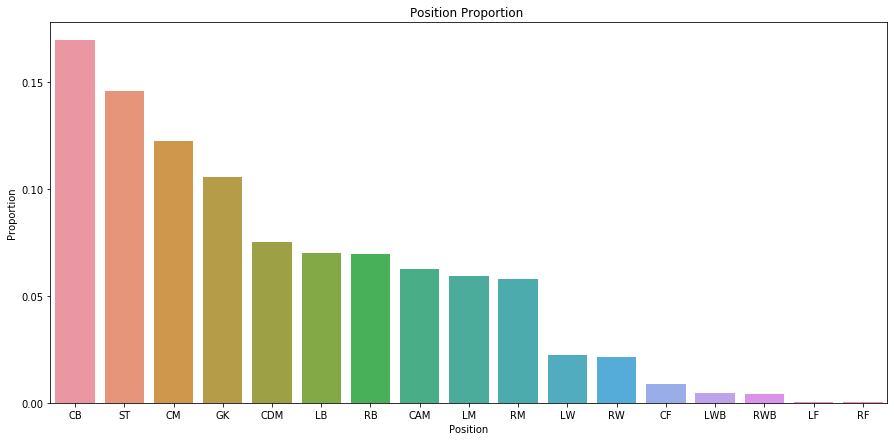

In [112]:
# Proportion Per Position 

n = df_eda.shape[0]
max_count = df_eda['position'].value_counts().max()
max_prop = max_count / n

# Tick mark locations
tick_props = np.arange(0, 1, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

def graph_position():
    sb.countplot(data = df_eda, x = 'position', order = df_eda['position'].value_counts().index); 
    plt.xlabel('Position')
    plt.ylabel('Proportion')
    plt.title('Position Proportion ')

plt.figure(figsize=[15,7])
plt.yticks(tick_props * n, tick_names)

graph_position()

In [14]:
# Create Dataframes per position 

# Goalkeeper Dataframe
goal = df_eda.query('position == "GK"')

# Defense Dataframe
defense = df_eda.query('position == "CB" or position == "RB" or position == "LB" or position == "RWB" or position == "LWB"')

# Midfield Dataframe
midfield = df_eda.query('position == "CAM" or position == "CM" or position == "CDM" or position == "RM" or position == "LM"')

# Attacking Dataframe
attack = df_eda.query('position == "ST" or position == "CF" or position == "RF" or position == "LF" or position == "LW" or position == "RW"')


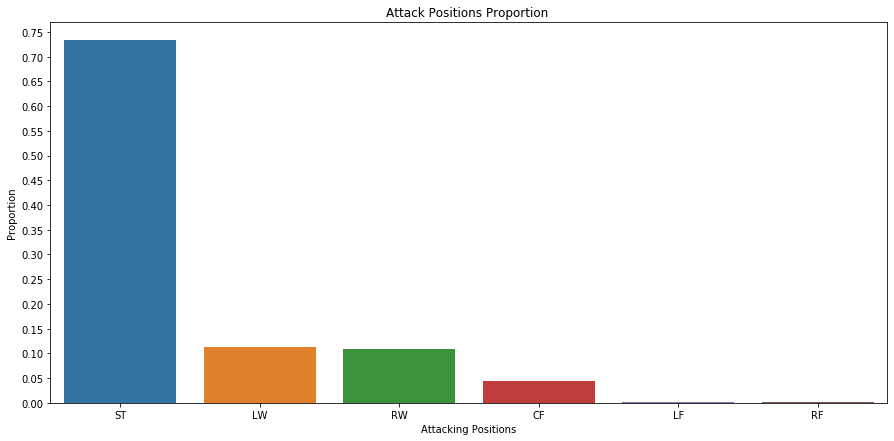

In [47]:
# Proportion Per Attacking Positions

n = attack.shape[0]
max_count = attack['position'].value_counts().max()
max_prop = max_count / n

# Tick mark locations
tick_props = np.arange(0, 1, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

def graph_attack():
    sb.countplot(data = attack, x = 'position', order = attack['position'].value_counts().index); 
    plt.xlabel('Attacking Positions')
    plt.ylabel('Proportion')
    plt.title('Attack Positions Proportion ')

plt.figure(figsize=[15,7])
plt.yticks(tick_props * n, tick_names)

graph_attack()

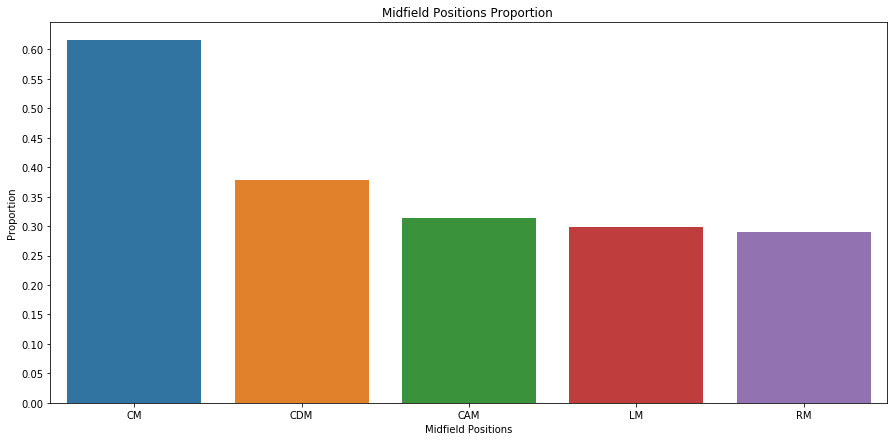

In [48]:
# Proportion Per Midfield Positions

n = attack.shape[0]
max_count = midfield['position'].value_counts().max()
max_prop = max_count / n

# Tick mark locations
tick_props = np.arange(0, 1, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

def graph_midfield():
    sb.countplot(data = midfield, x = 'position', order = midfield['position'].value_counts().index); 
    plt.xlabel('Midfield Positions')
    plt.ylabel('Proportion')
    plt.title('Midfield Positions Proportion ')

plt.figure(figsize=[15,7])
plt.yticks(tick_props * n, tick_names)

graph_midfield()

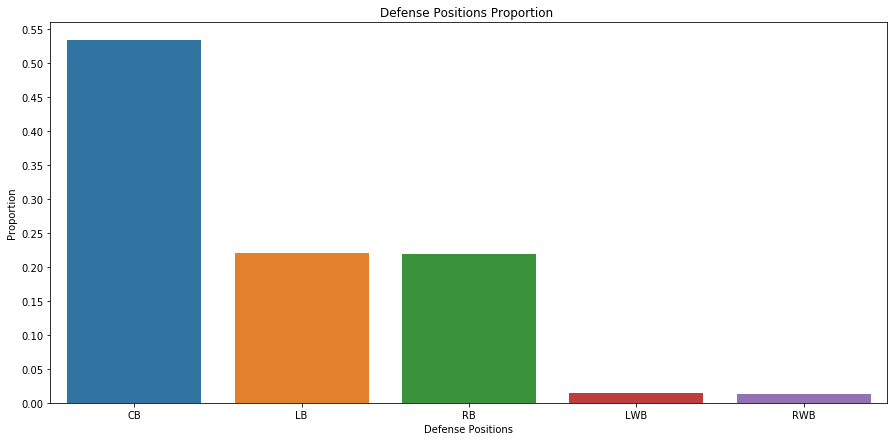

In [52]:
# Proportion Per Defense Positions

n = defense.shape[0]
max_count = midfield['position'].value_counts().max()
max_prop = max_count / n

# Tick mark locations
tick_props = np.arange(0, 1, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

def graph_defense():
    sb.countplot(data = defense, x = 'position', order = defense['position'].value_counts().index); 
    plt.xlabel('Defense Positions')
    plt.ylabel('Proportion')
    plt.title('Defense Positions Proportion ')

plt.figure(figsize=[15,7])
plt.yticks(tick_props * n, tick_names)

graph_defense()

### Categorical: Quality

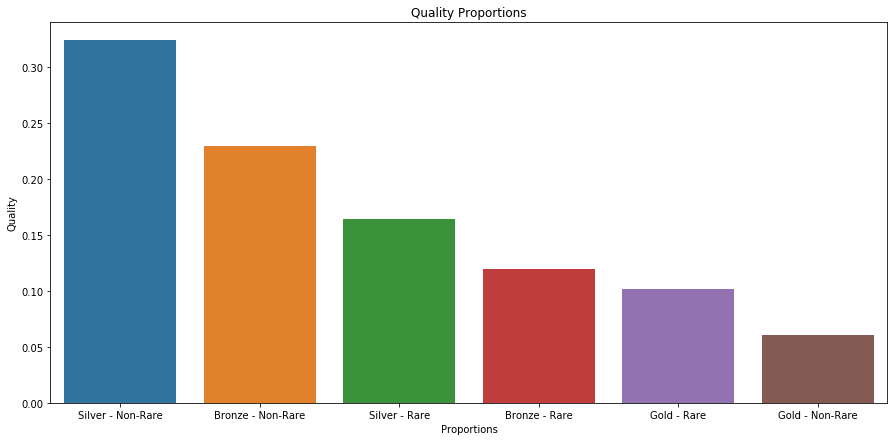

In [86]:
# Proportion Per Quality

n = defense.shape[0]
max_count = midfield['quality'].value_counts().max()
max_prop = max_count / n

# Tick mark locations
tick_props = np.arange(0, 1, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

def graph_quality():
    sb.countplot(data = defense, x = 'quality', order = defense['quality'].value_counts().index); 
    plt.xlabel('Proportions')
    plt.ylabel('Quality')
    plt.title('Quality Proportions')

plt.figure(figsize=[15,7])
plt.yticks(tick_props * n, tick_names)

graph_quality()

### Numeric: Overall 

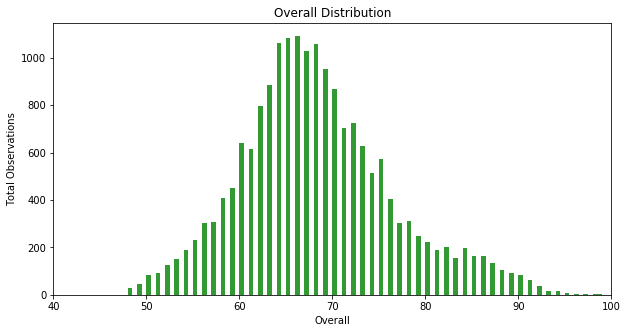

In [64]:
binsize = 0.5
bins = np.arange(0, df_eda['overall'].max()+binsize, binsize)

def graph_overall():
    plt.hist(data = df_eda, alpha=0.8, facecolor='g', x = 'overall', bins = bins)
    
plt.figure(figsize=[10,5])    
plt.title('Overall Distribution')    
plt.ylabel('Total Observations')
plt.xlabel('Overall')
plt.xlim([40, 100])


plt.show(graph_overall());

### Numeric: Age 

In [ ]:
binsize = 0.5
bins = np.arange(0, df_eda['age'].max()+binsize, binsize)

def graph_age():
    plt.hist(data = df_eda, alpha=0.8, facecolor='b', x = 'age', bins = bins)
    
plt.figure(figsize=[10,5])    
plt.title('Age Distribution')    
plt.ylabel('Total Observations')
plt.xlabel('Age')
plt.xlim([15,40])


plt.show(graph_age());

### Numeric: Height 

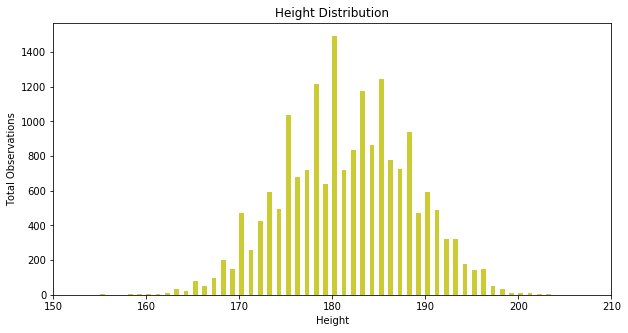

In [78]:
binsize = 0.5
bins = np.arange(0, df_eda['height'].max()+binsize, binsize)

def graph_height():
    plt.hist(data = df_eda, alpha=0.8, facecolor='y', x = 'height', bins = bins)
    
plt.figure(figsize=[10,5])    
plt.title('Height Distribution')    
plt.ylabel('Total Observations')
plt.xlabel('Height')
plt.xlim([150,210])

plt.show(graph_height());

### Numeric: Weight 

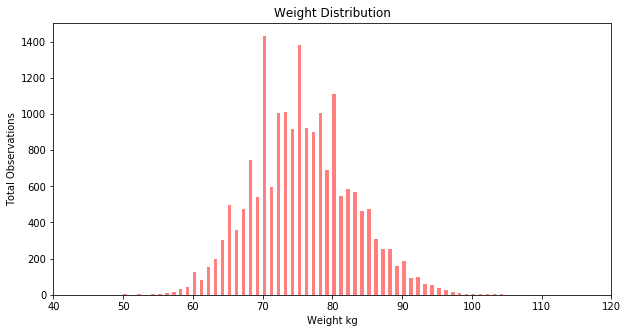

In [83]:
binsize = 0.5
bins = np.arange(0, df_eda['weight'].max()+binsize, binsize)

def graph_weight():
    plt.hist(data = df_eda, alpha=0.5, facecolor='r', x = 'weight', bins = bins)
    
plt.figure(figsize=[10,5])    
plt.title('Weight Distribution')    
plt.ylabel('Total Observations')
plt.xlabel('Weight kg')
plt.xlim([40,120])


plt.show(graph_weight());

### Numeric: Passing 

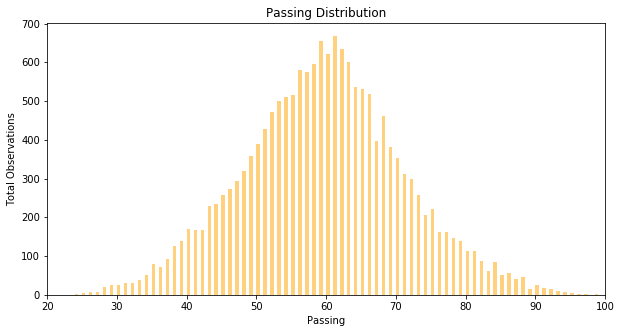

In [97]:
binsize = 0.5
bins = np.arange(0, df_eda['passing'].max()+binsize, binsize)

def graph_weight():
    plt.hist(data = df_eda, alpha=0.5, facecolor='orange', x = 'passing', bins = bins)
    
plt.figure(figsize=[10,5])    
plt.title('Passing Distribution')    
plt.ylabel('Total Observations')
plt.xlabel('Passing')
plt.xlim([20,100])


plt.show(graph_weight());

## Bivariate Exploration


In [15]:
numeric_vars = ['overall', 'age', 'height', 'weight', 'pace', 'dribbling', 'shooting', 'passing', 'defending', 'physicality'] 
                
categoric_vars = ['position','quality']



### Heat Map

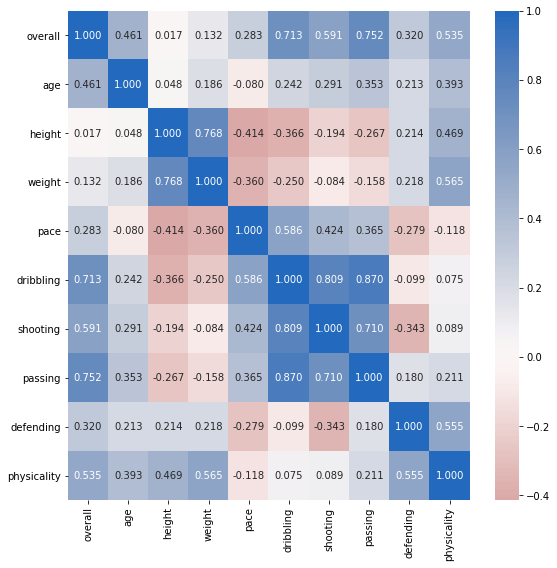

In [118]:
plt.figure(figsize=[9,9])   

def heat_graph():
    sb.heatmap(df_eda[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center=0)
    
heat_graph() 



The passing and the dribbling attributes are the main factors to predic the overall of a player. No other attribute has such impact on the overall.


### Correlation

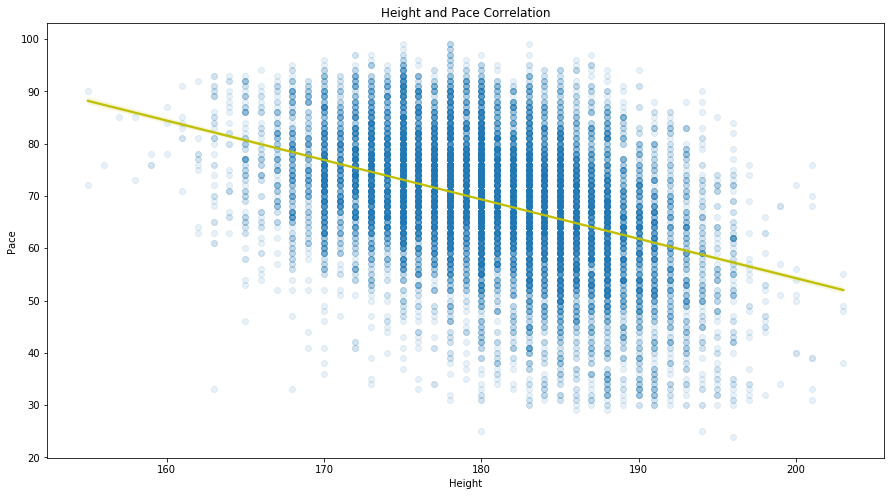

In [133]:
# Scatter plot - Height/Pace

ds = df_eda['height']
dk = df_eda['pace']

def height_pace_scatter():
    sb.regplot(ds, dk, color='y', scatter=False);
    sb.regplot(ds, dk, fit_reg=False, scatter_kws = {'alpha':0.1});
    plt.ylabel('Pace')
    plt.xlabel('Height')

plt.figure(figsize=[15,8])
plt.grid(False)
plt.title('Height and Pace Correlation')
#plt.ylim([0, 0.05])
#plt.xlim([0, 10000])

height_pace_scatter()

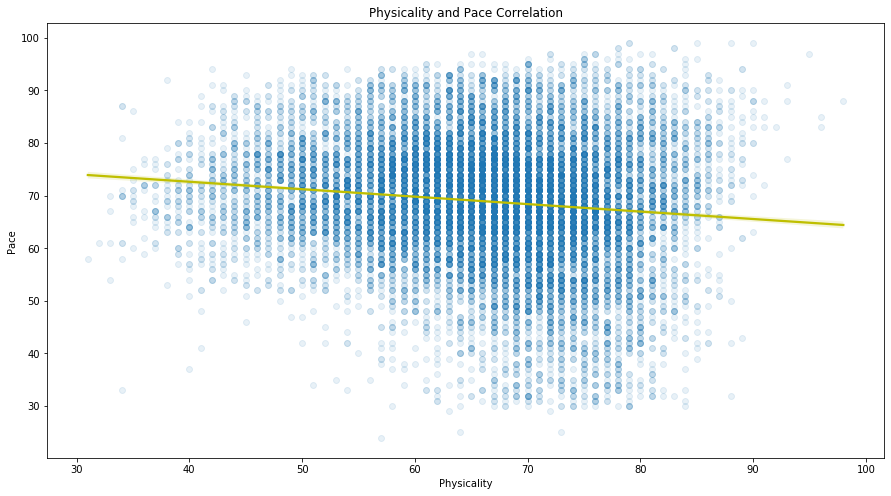

In [135]:
# Scatter plot - Physicality/Pace

ds = df_eda['physicality']
dk = df_eda['pace']

def physicality_pace_scatter():
    sb.regplot(ds, dk, color='y', scatter=False);
    sb.regplot(ds, dk, fit_reg=False, scatter_kws = {'alpha':0.1});
    plt.ylabel('Pace')
    plt.xlabel('Physicality')

plt.figure(figsize=[15,8])
plt.grid(False)
plt.title('Physicality and Pace Correlation')
#plt.ylim([0, 0.05])
#plt.xlim([0, 10000])

physicality_pace_scatter()

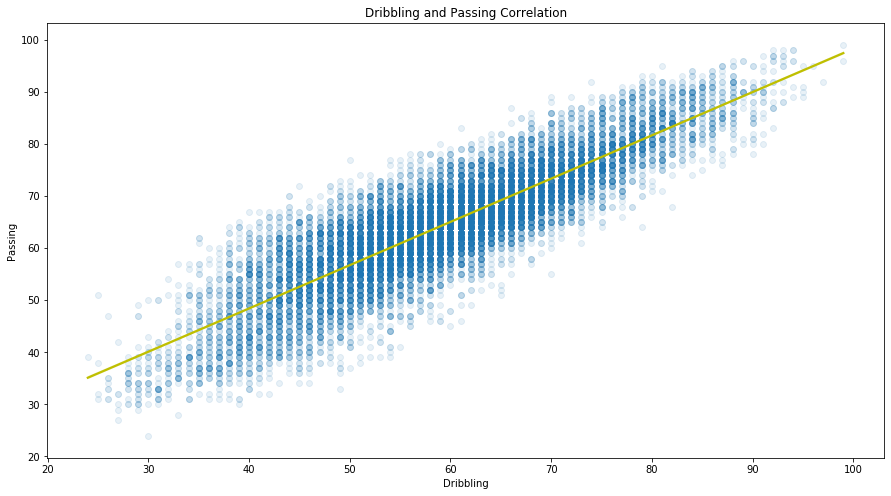

In [138]:
# Scatter plot - Passing/Dibbriling

ds = df_eda['passing']
dk = df_eda['dribbling']

def dribbling_passing_scatter():
    sb.regplot(ds, dk, color='y', scatter=False);
    sb.regplot(ds, dk, fit_reg=False, scatter_kws = {'alpha':0.1});
    plt.ylabel('Passing')
    plt.xlabel('Dribbling')

plt.figure(figsize=[15,8])
plt.grid(False)
plt.title('Dribbling and Passing Correlation')
#plt.ylim([0, 0.05])
#plt.xlim([0, 10000])

dribbling_passing_scatter()

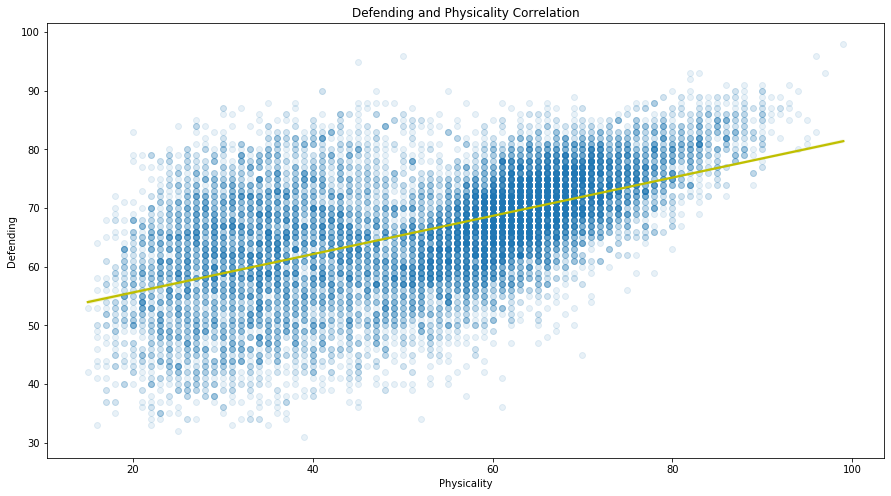

In [19]:
# Scatter plot - Defending/Psycality

ds = df_eda['defending']
dk = df_eda['physicality']

def defending_physicality_scatter():
    sb.regplot(ds, dk, color='y', scatter=False);
    sb.regplot(ds, dk, fit_reg=False, scatter_kws = {'alpha':0.1});
    plt.ylabel('Defending')
    plt.xlabel('Physicality')

plt.figure(figsize=[15,8])
plt.grid(False)
plt.title('Defending and Physicality Correlation')

defending_physicality_scatter()

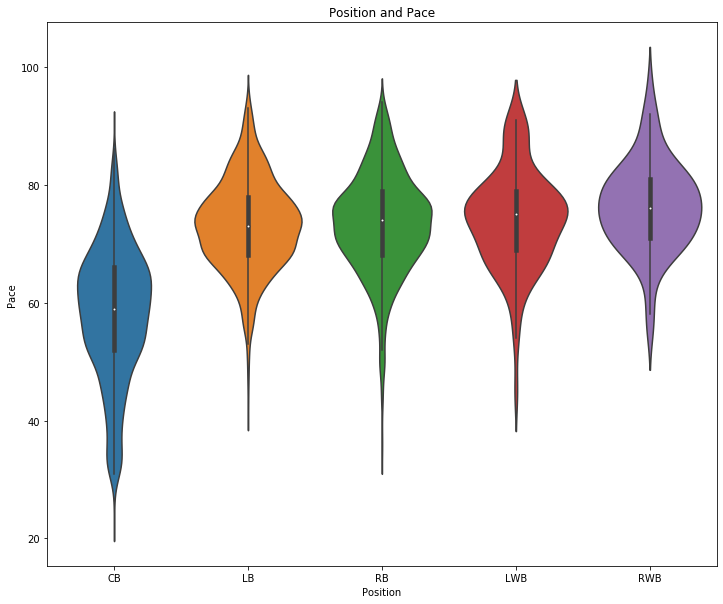

In [25]:
# Violin chart Pace per Position.

def defense_pace_violin():
    sb.violinplot(data = defense, x = 'position', y = 'pace', order = defense['position'].value_counts().index);
    plt.ylabel('Pace')
    plt.xlabel('Position')
    
plt.figure(figsize=[12,10])
plt.title('Position and Pace')

defense_pace_violin()

We can verify that left-backs and left-winger-backs have similar violin shapes, meaning that there is a small difference between them. Left-backs are usually left-footed and more tecnical players. This might be the reason why the difference is smaller between LB and LWB than between RB and RWB. It maybe hard to find a right-footed player, playing in a RWB position. It is a position that requires a lot of ability and technique and this type of player could be moved to a RW or RM position. From the Univariate Study, we found out that RWB and LWB players are rare. 

##### Right-Back and Right-Wing-Back Comparison

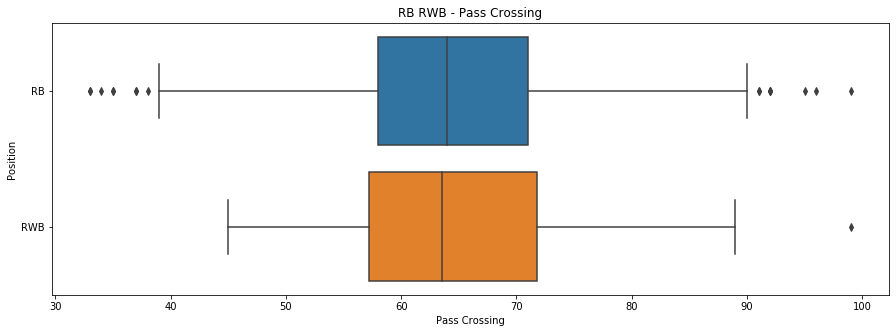

In [45]:
# Box chart for RB/RWB Positions pass_crossing

rb_rwb = defense.query('position == "RB" or position == "RWB"')

def rb_rwb_box_pass_crs():
    sb.boxplot(data = rb_rwb, x = 'pass_crossing', y = 'position')
    plt.ylabel('Position')
    plt.xlabel('Pass Crossing')
    
plt.figure(figsize=[15,5])
plt.ylim([0, 8])
plt.title('RB RWB - Pass Crossing')

rb_rwb_box_pass_crs()

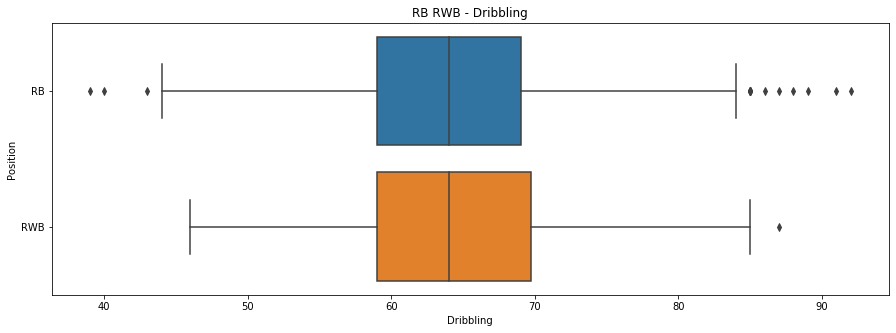

In [44]:
# Box chart for RB/RWB Positions dribbling

rb_rwb = defense.query('position == "RB" or position == "RWB"')

def rb_rwb_box_dribb():
    sb.boxplot(data = rb_rwb, x = 'dribbling', y = 'position')
    plt.ylabel('Position')
    plt.xlabel('Dribbling')
    
plt.figure(figsize=[15,5])
plt.ylim([0, 8])
plt.title('RB RWB - Dribbling')

rb_rwb_box_dribb()

By looking at crossing and dribbling for both RB and RWB positions, we can verify that there are more outliers for the RB position. The range for the RWB is smaller which makes sense since it is a rare position and players tend to be specialized in the role. 

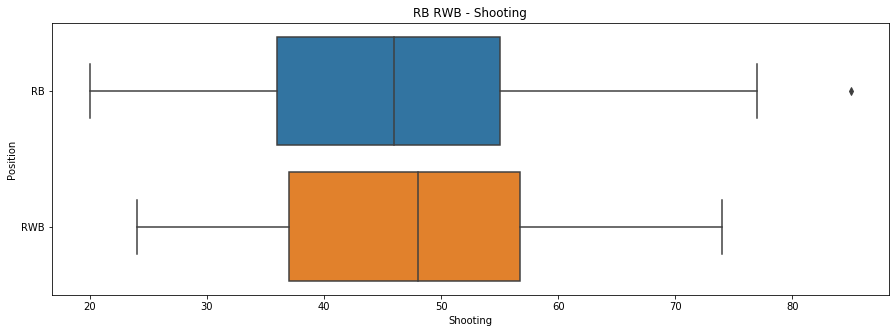

In [46]:
# Box chart for RB/RWB Positions shooting

rb_rwb = defense.query('position == "RB" or position == "RWB"')

def rb_rwb_box_shoot():
    sb.boxplot(data = rb_rwb, x = 'shooting', y = 'position')
    plt.ylabel('Position')
    plt.xlabel('Shooting')
    
plt.figure(figsize=[15,5])
plt.ylim([0, 8])
plt.title('RB RWB - Shooting')

rb_rwb_box_shoot()

By analyzing the shooting comparison we can see that RWB are slighter better finishers than Right-backs. It makes sense. As mentioned before, this kind of player is also used as a RW, RM, RF positions closer to finishing positions. 

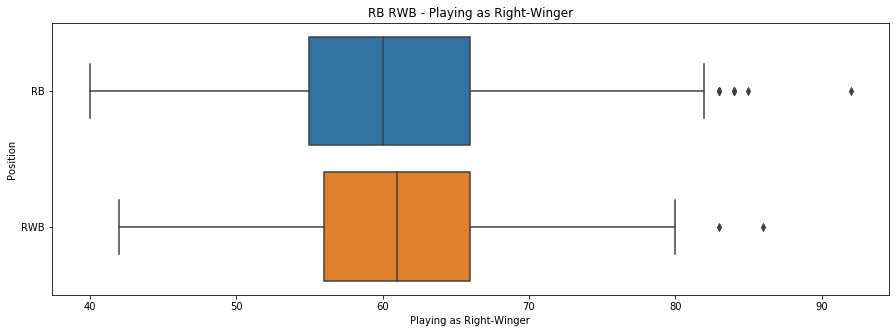

In [47]:
# RB and RWB playing as RW

rb_rwb = defense.query('position == "RB" or position == "RWB"')

def rb_rwb_box_playrw():
    sb.boxplot(data = rb_rwb, x = 'rw', y = 'position')
    plt.ylabel('Position')
    plt.xlabel('Playing as Right-Winger')
    
plt.figure(figsize=[15,5])
plt.ylim([0, 8])
plt.title('RB RWB - Playing as Right-Winger')

rb_rwb_box_playrw()



Now lets look at Right-backs and Right-wing-backs playing as Right-Foward. The interquartile of RWB has a smaller range than the RB's. This shows us that RWB's have a less defending mind-set than RB's. 

## Multivariate Exploration

In [93]:
# Functions per attributes.

# Body 
def height():
    plt.title('Height'), 
    plt.axvline(df.height.mean(), c='red'),
    plt.hist(df.height, alpha=0.5)    
    
def weight():
    plt.title('Weight'), 
    plt.axvline(df.weight.mean(), c='red'),
    plt.hist(df.weight, alpha=0.5)    

# Speed and Acceleration 
def pace(pos):
    plt.title('Pace'), 
    plt.axvline(pos.pace.mean(), c='red'),
    plt.hist(pos.pace, alpha=0.5)
     
def pace_acc(pos):
    plt.title('Pace Acceleration'), 
    plt.axvline(pos.pace_acceleration.mean(), c='red'),
    plt.hist(pos.pace_acceleration, alpha=0.5)

def pace_sprint(pos):
    plt.title('Pace Sprint Speed:'), 
    plt.axvline(pos.pace_sprint_speed.mean(), c='red'),
    plt.hist(pos.pace_sprint_speed, alpha=0.5)

# Shooting
def shooting(pos):
    plt.title('Shooting:'), 
    plt.axvline(pos.shooting.mean(), c='red'),
    plt.hist(pos.shooting, alpha=0.5)

# Passing 
def passing(pos):
    plt.title('Passing:'), 
    plt.axvline(pos.passing.mean(), c='red'),
    plt.hist(pos.passing, alpha=0.5)

def passing_long(pos):
    plt.title('Long Passing:'), 
    plt.axvline(pos.pass_long.mean(), c='red'),
    plt.hist(pos.pass_long, alpha=0.5)

# Defending 
def defending(pos):
    plt.title('Defending:'), 
    plt.axvline(pos.defending.mean(), c='red'),
    plt.hist(pos.defending, alpha=0.5)



### Cleaning Data

#### Counter-attacking 4-4-2 strategy

Analysis of a counter-attacking strategy built over a 4-4-2. In the defense, the team needs two Centre-backs (CB's) one tall and the other one fast enough to cover. Since the strategy is a low defense line to attract the opponent, a strong left and right backs (LB, RB) are needed to gain back the possession. These two players will cover half of the pitch extension and they need to be good at defending and passing. They don't need to be good at the attack or crossing. In the midfield, two central midfielders (CDM, CM/CAM) will share the task of attacking the opponent to gain the possession back and start the counter-attack. So we need a tall midfielder, good in the air, strong tackling and another one good at long passing. On the sides, two speedsters are needed to support the strikers. They will also be important in defending when losing possession upfront and recomposing. In the attacking positions, we need one tall and strong striker and a goal scoring number 9. When the ball reaches the attacking positions, the two fast right and left-wingers will give a passing option to the strikers. 

**Centre-Back 1** = Tall, good in the air, good at the positioning. \
**Centre-Back 2** = Medium height, fast enough to cover CB 1 and good at the positioning. 

**Left Back** - Good at defense and passing. \
**Right Back** - Good at defense and passing. 

**Central Defensive Midfielder** - Tall, good in the air, strong tackling. \
**Central Attacking Midfielder** - Good at long passing, good vision. 

**Left Winger** - Speedsters. Good crossing.\
**Right Winger** - Speedsters. Good crossing.

**Striker** - Clinical at finishing. \
**Centre-forward** - Strong, good ball control. 